In [770]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpl_style

from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

from kernal import linear, polynomial, rbf

# Ej 1

### a) Construct a set 'TP3-1' of linearly separable examples at < 2 (e.g., randomly generate points in [0, 5]x[0, 5] such that they belong to two linearly separable classes 1 and -1). Use a simple step perceptron to separate the ensemble linearly. Is the separation hyperplane optimal? Justify the answer.

§

### Defenitions for plotting and perceptron

In [771]:
# This is for the spliting line function

'''
n_items = the amount of items generated randomly in [0,5][0,5]
b0 = the bias
b1 and b2 = the weights of the line on which the class split is made.

Class is eiter 1 or -1 depending on if it's above or below the line
'''

choice_list = ['normal',
               'steep',
               'steep_low',
               'shallow',
               'shallow_high',
               'negative',]

def choose(choice='normal', n=1000):
    n_items = n

    if choice == 'normal': b0=1; b1=2; b2=-2
    if choice == 'steep': b0=-2; b1=2; b2=-1
    if choice == 'steep_low': b0=-8; b1=3; b2=-1
    if choice == 'shallow': b0=1; b1=2; b2=-4
    if choice == 'shallow_high': b0=9; b1=1; b2=-3
    if choice == 'negative': b0=5; b1=-1; b2=-1

    return n_items, float(b0), float(b1), float(b2)



# Use this number (0 to 5) to choose the line you want to use
num = 5
amount = 20

n_items, b0, b1, b2 = choose(choice_list[num], amount)
n_items, ogb0, ogb1, ogb2 = choose(choice_list[num], amount) # og = original, only used for plot titles

print(f"kind: {choice_list[num]} \nb0: {b0} \nb1: {b1} \nb2: {b2}")

kind: negative 
b0: 5.0 
b1: -1.0 
b2: -1.0


In [772]:
def plotting(data, b0=b0, b1=b1, b2=b2, line=True, legend=False, title="Title", subtitle=False):
    
    '''
    This will plot the scatterplot of the data and the line. It's for visualisation only
    Choose a different b0, b1, b2 to plot a different line if you want
    line = true will draw this line, false won'test_1
    Legend = true removes the legend. This might be anoying with some plots  
    '''

    factor = ogb0/b0
    b0n = b0* factor
    b1n = b1*factor
    b2n = b2*factor


    # normalizing_factor = b0/bias
    # weights_normalized = weights * normalizing_factor
    # bias_normalized = bias * normalizing_factor

    #For the line in the plot
    if line:
        x1_for_line = np.linspace(0, 5, 100)
        x2_for_line = (-b0 - b1 * x1_for_line) / b2
        plt.figure(figsize=(8, 6))
        plt.plot(x1_for_line, x2_for_line, label=f'{round(b0)} + {round(b1)}x1 + {round(b2)}x2', color='green', linestyle='--')
        plt.scatter(data['x1'], data['x2'], label='Data', c=data['y'], marker='.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.axhline(0, color='grey', linewidth=0.5)
        plt.axvline(0, color='grey', linewidth=0.5)

    else:
        plt.figure(figsize=(8, 6))
        # plt.plot(x1_for_line, x2_for_line, label=f'{round(b0)} + {round(b1)}x1 + {round(b2)}x2', color='blue')
        plt.scatter(data['x1'], data['x2'], label='Data', c=data['y'], marker='.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.axhline(0, color='grey', linewidth=0.5)
        plt.axvline(0, color='grey', linewidth=0.5)

    # Set the title and subtitle
    plt.title(title, fontsize=14)
    if subtitle:
        plt.suptitle(f"new: {round(b0n, 3)} + {round(b1n, 3)} + {round(b2n, 3)}\nold: {round(ogb0, 3)} + {round(ogb1, 3)} + {round(ogb2, 3)}", fontsize=11)

    # Make the background transparent
    plt.gca().set_facecolor('none')

    # Hide the outer lines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    if legend:    
        plt.legend()
    plt.show()

In [773]:
def report(test_data, weights, bias):

    '''
    test data = unseen data
    weights = weights of the model like [w1, w2]
    bias = bias of the model
    '''
    
    y_pred_1 = np.dot(test_data[['x1', 'x2']].values, weights) + bias
    y_pred_1 = np.where(y_pred_1 > 0, 1, -1)

    # Calculate the classification report from sklearn metrics
    report = classification_report(test_data['y'], y_pred_1)
    print(report)

In [774]:
def perceptron_train(X, y, learning_rate=0.1, n_epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_epochs):
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction > 0:
                y_pred = 1
            else:
                y_pred = -1
            
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
    
    return weights, bias

### Data creation
train_1, test_1, train_2, test_2

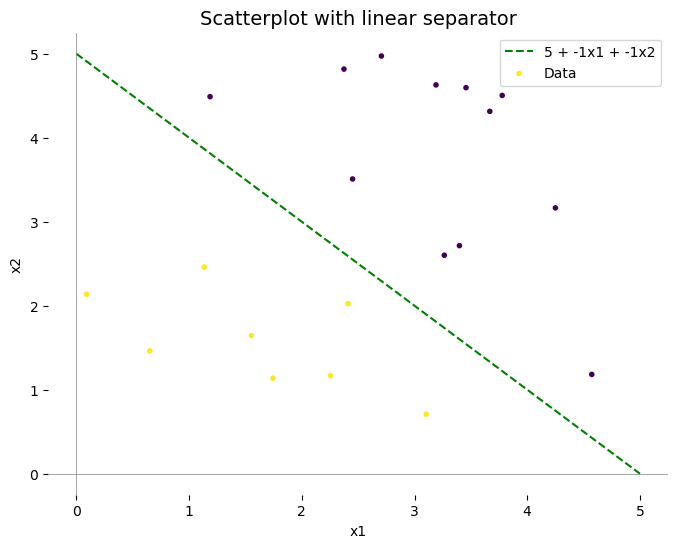

In [775]:
# the following is for the linespace representation of the line in the plot
x1_for_line = np.linspace(0, 5, 100)
x2_for_line = (-b0 - b1 * x1_for_line) / b2

x1 = [random.uniform(0, 5) for i in range(n_items)]
x2 = [random.uniform(0, 5) for i in range(n_items)]
y = [1 if (b0 + b1 * x1[i] + b2 * x2[i]) > 0 else -1 for i in range(n_items)]

# create TP3_1, TP3_2, and creating a train test split
TP3_1 = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
TP3_2 = TP3_1.copy()
train_1, test_1 = train_test_split(TP3_1, test_size=0.3)
train_2, test_2 = train_test_split(TP3_2, test_size=0.3)

plotting(TP3_1, b0, b1, b2, legend=True, title="Scatterplot with linear separator")

### Training

In [776]:
# perform the perceptron training
weights, bias = perceptron_train(train_1[['x1', 'x2']].values, train_1['y'].values, n_epochs=100, learning_rate=0.1)

w_old = weights
b_old = bias

### Prediction and testing

In [777]:
report(test_1, weights, bias)

# The report is avtually very nice. F1 of 1 an precision of 1 as well
# All the test datapoints are classified correctly 

# This changes thought when using higher sample sizes but it will remain high

              precision    recall  f1-score   support

          -1       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6




### b) Obtain the optimal hyperplane from the hyperplane obtained with the perceptron simple.

### pt 2

In [778]:
# def perceptron_optimal(data, labels, epochs=100, learning_rate=0.01):
#     w = np.random.rand(2)
#     b = 0
    
#     for epoch in range(epochs):
#         total_error = 0
#         for point, label in zip(data, labels):
#             pred = np.dot(point, w) + b
#             if np.sign(pred) != label: # misclassified point
#                 total_error += abs(label - pred) # error is the distance from the point to the line
#                 w += learning_rate * label * point # update weights
#                 b += learning_rate * label  # update bias
#         if total_error == 0:  # if no error, stop
#             break
#     return w, b



def perceptron_optimal(data, labels, epochs=100, learning_rate=0.01):
    w = np.random.rand(2)
    b = 0
    best_w = None
    best_b = 0
    max_margin = 0

    for epoch in range(epochs):
        total_error = 0
        for point, label in zip(data, labels):
            pred = np.dot(point, w) + b
            if np.sign(pred) != label: # misclassified point
                total_error += abs(label - pred) # error is the distance from the point to the line
                w += learning_rate * label * point # update weights
                b += learning_rate * label  # update bias
        
        # if no error, compute the margin and update best_w and best_b if this margin is the largest
        if total_error == 0:
            margin = np.min([np.dot(point, w) + b for point, label in zip(data, labels) if label == 1]) - \
                     np.max([np.dot(point, w) + b for point, label in zip(data, labels) if label == -1])
            if margin > max_margin:
                max_margin = margin
                best_w = w.copy()
                best_b = b

    return best_w, best_b



In [779]:
w_old, b_old = perceptron_train(train_1[['x1', 'x2']].values, train_1['y'].values)
weights, bias = perceptron_optimal(train_1[['x1', 'x2']].values, train_1['y'].values)


# report(test_1, weights, bias)

## break

Normalizing factor: 45.45454545454546
Final weights: [-1.0893121  -0.73218988]
Final bias: 5.0

Hyperplane: 5.0 + -1.09x1 + -0.73x2


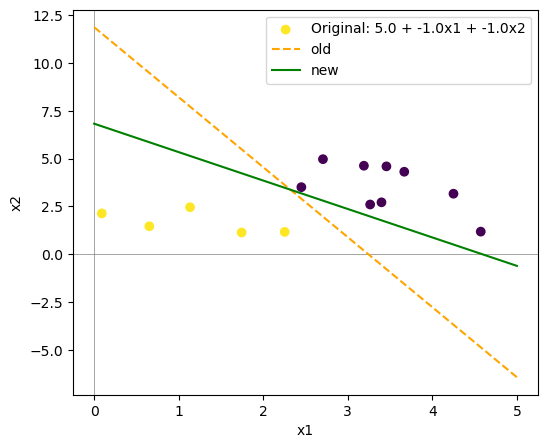

In [780]:
# First normalize the model to b0 so that the models b0 will be the same as the generated data b0
normalizing_factor = b0/bias
weights_normalized = weights * normalizing_factor
bias_normalized = bias * normalizing_factor

print(f'Normalizing factor: {normalizing_factor}')
print(f'Final weights: {weights_normalized}\nFinal bias: {bias_normalized}\n\nHyperplane: {bias_normalized.round(2)} + {weights_normalized[0].round(2)}x1 + {weights_normalized[1].round(2)}x2')

def x_y(weights, bias): # plotting the output
    x_boundary = np.linspace(0, 5, 100)
    y_boundary = (-weights[0] * x_boundary - bias) / weights[1]
    return x_boundary, y_boundary

# plotting the output
plt.figure(figsize=(6, 5))
plt.scatter(train_1['x1'], train_1['x2'], label=f"Original: {b0} + {b1}x1 + {b2}x2", c=train_1['y'], marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
# plt.plot(x_boundary, y_boundary, label=f"Result: {round(bias_normalized, 2)} + {round(weights_normalized[0], 2)}x1 + {weights_normalized[1].round(2)}x2", color='green', linestyle='--')


x_old, y_old = x_y(w_old, b_old)
x_new, y_new = x_y(weights, bias)


# old
plt.plot(x_old, y_old, label="old", color='orange', linestyle='--')

# new
plt.plot(x_new, y_new, label="new", color='green', linestyle='-')

plt.legend()
plt.show()

### c) Construct the set 'TP3-2' in an analogous way to how you constructed the set 'TP3-1' but this time include some examples that are misclassified near the separating hyperplane. Use a simple perceptron to separate the two classes. Comment on the results.

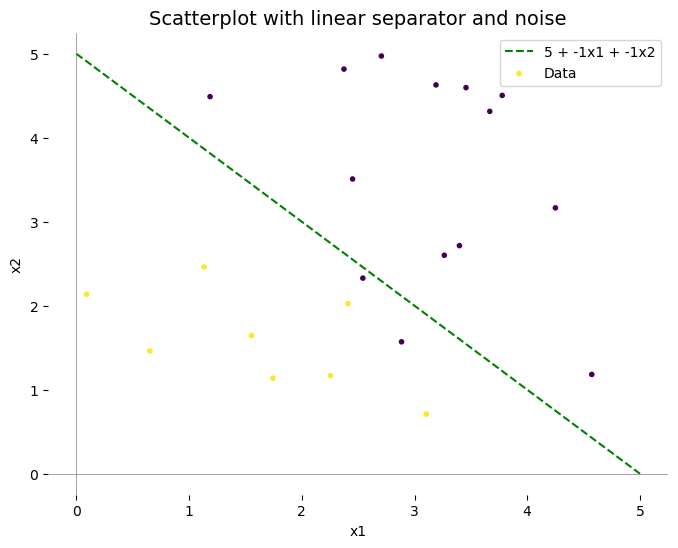

In [781]:
n_additional_points = round(n_items / 2)
additional_data = []

# Generate additional data points near the separating hyperplane
for _ in range(n_additional_points):
    x1_new = random.uniform(0, 5)
    x2_new = random.uniform(0, 5)
    
    # Calculate the distance from the point to the separating hyperplane
    distance = abs(b0 + b1 * x1_new + b2 * x2_new) / (b1 ** 2 + b2 ** 2) ** 0.5
    
    # Check if the distance is less than 0.5 (within 0.5 units from the hyperplane), if so, append.
    if distance <= 0.5:
        class_label = 1 if not (b0 + b1 * x1_new + b2 * x2_new) > 0 else -1
        additional_data.append({'x1': x1_new, 'x2': x2_new, 'y': (class_label)}) # for some reason it does it oposite so -1 to fix


additional_df = pd.DataFrame(additional_data)
TP3_2 = pd.concat([TP3_2, additional_df], ignore_index=False)

plotting(TP3_2, line=True, legend=True, title="Scatterplot with linear separator and noise")

### d) Use SVM to classify both set 'TP3-1' and set 'TP3-2'. Compare the results with those obtained in points a) and c).


In [782]:
data = TP3_2

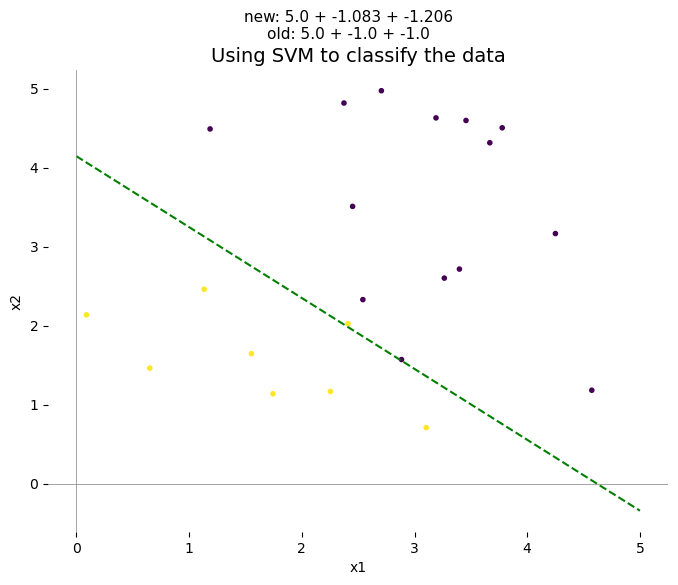

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        14
           1       1.00      0.88      0.93         8

    accuracy                           0.95        22
   macro avg       0.97      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



In [783]:
def svm_train(data, learning_rate=0.01, lambda_param=0.01, num_epochs=1000, tolerance=1e-5):
    # Extract features and labels
    X = data[['x1', 'x2']].values
    y = data['y'].values

    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    for epoch in range(num_epochs):
        gradient_w = np.zeros(w.shape)
        gradient_b = 0
        cost = 0

        for i in range(len(X)):
            decision = y[i] * (np.dot(w, X[i]) + b)
    
            if decision < 1:
                # Misclassified point
                gradient_w += (X[i] * y[i])
                gradient_b += y[i]
                cost += 1 - decision

        # Regularization term
        gradient_w -= 2 * lambda_param * w

        # Update weights and bias
        w = w + learning_rate * gradient_w
        b = b + learning_rate * gradient_b

        # Check convergence
        if cost < tolerance:
            break

    return w, b


w, b = svm_train(data, learning_rate=0.01, lambda_param=0.01)

plotting(data, b0=b, b1=w[0], b2=w[1], 
         subtitle=True, 
         title='Using SVM to classify the data')

report(data, w, b)
